Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Daniël Vink"
COLLABORATORS = "Sam Kuilboer"

---
# Homework set 2

# Exercise 0
Write down the names + student ID of the people in your group.

Daniël Vink - 10675140 
Sam Kuilboer - 12442690

Run the following cell to import the nessecary packages.

In [33]:
%matplotlib inline
import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt

-----
# Exercise 1 (2.1 on the Exercise sheet)

##### NOTE: You may also submit Exercise 1 as a pdf of your handwritten solutions if you prefer. If so, indicate this where you would put your answers below

## (a) 1 point
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

### Answer:

A matrix is singular when the Det(A) = 0

$Det(A) = 0$ 
  
$Det(A) = (2 * -\frac{3}{2} - \alpha) - (-1)(2 * -\frac{3}{2}) + \alpha(2 \alpha)$  
  
$-3-3- \alpha + 2 \alpha^2 = 0$
  
$\alpha^2 - -\frac{1}{2} \alpha - 3 = 0 $

$\alpha = 2$ OR $\alpha = -\frac{3}{2}$


## (b) 1 point
Consider the following linear system of equations:
$$
\begin{align*}
2x + y + z & = 3 \\
2x - y + 3z &= 5 \\
-2x + \alpha y + 3z &= 1.
\end{align*}
$$
For what values of $\alpha$ does this system have an infinite number of solutions?

### Answer:

A system can have an infinite number of solutions when the system is singular and consistent. We know a system is singular when the $det(A) = 0$ and it is consistent when its solution is a linear combination of the system.


$det(A) = 0$ when: \
$(2*(-3 -3*\alpha)) - (1*(6--6)) + (1*(2*\alpha -2)) = 0$ \
$-6 -6*\alpha -12 +2*\alpha -2 = 0$ \
$-4*\alpha -20 = 0$ \
$\alpha = -5$

If you fill in this value for alpha in the matrix A, and rewrite it in row-echelon form you get the following matrix:\
$\begin{bmatrix}2 & 1 & 1 & 3\\ 2 & -1 & 3 & 5\\ -2 & -5 & 3 & 1\end{bmatrix}$ \
If you then subtract row 1 from row 2, and add row 1 to row 3 you get:\
$\begin{bmatrix}2 & 1 & 1 & 3\\ 0 & -2 & 2 & 2\\ 0 & -4 & 4 & 4\end{bmatrix}$ \
From which it is clearly visible that row 2 and 3 are the same line, so the system is consistent. The final solution for the system is then:\
$\begin{bmatrix}2-z \\ z-1 \\ z\end{bmatrix}$

## (c) 2 points
Denote the columns of an $n \times n$ matrix $A$ as $A_k$ for $k=1,\ldots,n$. We define the function $||A||_* = \max_k ||A_k||_2$. Show that $||A||_*$ is a norm, in that it satisfies the first three properties of a matrix norm (cf. §2.3.2).

The function $||A||_*$ is defined as the maximum result between the 2-norm of its n columns. The definition for the 2-norm of a vector is:\
$||x||_2 = \sqrt(\sum_i |x_i|^2)$ \
So for every element in the vector, its absolute value is squared and summed. This will always result in a positive number, unless all the elements in the vector are 0. So: for any matrix $A \neq O$, which means any matrix that has at least 1 non-zero element, the maximum result between the 2-norm of all its column vectors will at least be higher than 0. The equation satisfies the first property of a matrix norm. 

Because the function $||A||_*$ is defined as the maximum result between the 2-norm of its n columns, if we want to calculate the result of a scalar multiplied matrix $\gamma A$, we can rewrite the equation $||\gamma A||_*$ as: \
$max_k ||\gamma A_k||_2$ \
And since we know that for any vector norm it holds true that: \
$||\gamma x|| = |\gamma| * ||x||$ \
We can say it also holds true for our function and thus it satisfies the second property of a matrix norm.

Lets define the matrix $A = B + C$. Because the function $||A||_*$ is defined as the maximum result between the 2-norm of its n columns, and the sum of two matrices $B$ and $C$ is defined as the element wise sum of these matrices, we know that if we calculate the 2-norm of the matrices $B$ and $C$ there are two options:
* The largest 2-norm vector is the same column in $B$ and in $C$
* The largest 2-norm vectors of $B$ and $C$ are different columns

In the first case, the sum of the two 2-norms is equal to the 2-norm of the element-wise summed matrix $A$ because norms are calculated over the same values. In the second case, the element-wise addition of the matrices $B$ and $C$ means that the column of $B$ with the highest norm is added to a column of $C$ that has a lower or equal norm than the column of $C$ with the highest norm. That means that the result of our function of the matrix $A$ is either lower than or equal to the sum of the results of our function on the matrices $B$ and $C$. This means our function also satisfies the third property of a matrix norm. 


----
# Exercise 2
For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a) 2 points
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

In [2]:
def invert(A):
    ''' Calculates the inverse of a square input matrix by using its LU-decomposition.
    It solves the equations Uz=I and Lx=z as substeps.
    '''
    n = np.shape(A)[0]
    inverse = np.zeros((n, n))
    identity = np.identity(n)
    
    P, L, U = la.lu(A) # LU-decomposition
    
    # For every column solve the subequations.
    for i in range(n): 
        z = la.solve_triangular(L, identity[i], lower=True)
        x = la.solve_triangular(U, z)
        inverse[i] = x
    # Result is transposed because calculations use rows.
    return np.dot(inverse.T, P)


matrix = np.array([[2,1,1], [2,-1,3], [-2, 100, 3]])

print(matrix) # Input
print(invert(matrix)) # Output
print(la.inv(matrix)) # Test


[[  2   1   1]
 [  2  -1   3]
 [ -2 100   3]]
[[ 0.72142857 -0.23095238 -0.00952381]
 [ 0.02857143 -0.01904762  0.00952381]
 [-0.47142857  0.48095238  0.00952381]]
[[ 0.72142857 -0.23095238 -0.00952381]
 [ 0.02857143 -0.01904762  0.00952381]
 [-0.47142857  0.48095238  0.00952381]]


## (b) 1 point
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?
Give a short calculation/explanation for your answer.

Computational complexity is the amount of resources require to run the algorithm. In this case the complexity is equal to the amount of calculations, being:

for size $n * n$ = $complexity(la.lu(n)) + 2 * complexity(la.solvetriangular(n))$

The complexity of both la.lu and la.solvetriangular are exponential, leading to:

for size $n *n$ = $n^2 + 2n^2$

which is represented in the following plot:

In [1]:
n = 1000
x = list(range(0, n))
y = [_*_+2*(_*_) for _ in x]
plt.plot(x, y)




NameError: name 'plt' is not defined

## (c) 1 point
Apply your Python code to compute the inverse of the Hilbert matrix $H_n$ for $n=1, \ldots, 12$ (see https://en.wikipedia.org/wiki/Hilbert_matrix) -- you can use `scipy.linalg.hilbert`. This matrix is _very_ ill-conditioned, so computing its inverse is very hard for large $n$.

Compare the inverse with the "true" inverse given by `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing how the $\infty$-norm of their difference progresses for $n$.

[[   9.  -36.   30.]
 [ -36.  192. -180.]
 [  30. -180.  180.]]
[[   9.  -36.   30.]
 [ -36.  192. -180.]
 [  30. -180.  180.]]
[[-2.84217094e-14  1.42108547e-13 -1.35003120e-13]
 [ 1.49213975e-13 -7.38964445e-13  6.82121026e-13]
 [-1.38555833e-13  6.82121026e-13 -6.25277607e-13]]


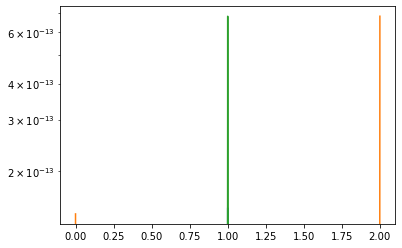

## (d) 2 points
It is known that the $2$-condition number $cond_2(H_n)$ of the Hilbert matrix grows like $\mathcal O\left(\frac{(1+\sqrt{2})^{4n}}{\sqrt{n}}\right)$. Does the $\infty$-condition number (defined in Example 2.5) of $H_n$ grow in a similar way?
For the matrix inverse, try both your own matrix inversion routine, and `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing your results.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()